# **Jatim Journey Recomendation System**

### **Library**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.callbacks import EarlyStopping

### **Load Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving place_dataset.csv to place_dataset.csv
Saving user_id.csv to user_id.csv
Saving user_place_rate.csv to user_place_rate.csv


In [3]:
place_rate = pd.read_csv('user_place_rate.csv')
user = pd.read_csv('user_id.csv')
place = pd.read_csv('place_dataset.csv', dtype={"phone": object})

### Dataset Place

In [4]:
place.head()

,city,place_id,place,category,rating,description,phone,sites,price,travel1,travel2,travel3,travel4,images
0,Bangkalan,1001,Agro Edu Wisata Kebun Bang Jani,Wisata Alam,4.1,Agro Edu Wisata Kebun Bang Jani offers an educ...,085231219104,NaN,$,NaN,NaN,NaN,NaN,NaN
1,Bangkalan,1002,Pantai Rindu,Wisata Bahari,4.5,Pantai Rindu is a beautiful beach located in B...,NaN,NaN,$,NaN,NaN,NaN,NaN,NaN
2,Bangkalan,1003,Dermaga Rindu,Budaya,4.1,"Dermaga Rindu is located in Bangkalan, a popul...",NaN,https://bangsringunderwater.com/,$,NaN,NaN,NaN,NaN,NaN
3,Bangkalan,1004,Pandela (Pantai Desa Lajing),Wisata Bahari,4.4,"Pandela Beach, located in Lajing Village, Bang...",081333444609,NaN,$,NaN,NaN,NaN,NaN,NaN
4,Bangkalan,1005,Pantai Biru,Wisata Bahari,4.6,"Located in Bangkalan, Pantai Biru is a stunnin...",085852222291,http://mangrovebedul.blogspot.com/,$,NaN,NaN,NaN,NaN,NaN


In [5]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         691 non-null    object 
 1   place_id     691 non-null    int64  
 2   place        691 non-null    object 
 3   category     691 non-null    object 
 4   rating       691 non-null    float64
 5   description  691 non-null    object 
 6   phone        276 non-null    object 
 7   sites        143 non-null    object 
 8   price        691 non-null    object 
 9   travel1      11 non-null     object 
 10  travel2      4 non-null      object 
 11  travel3      2 non-null      object 
 12  travel4      0 non-null      float64
 13  images       0 non-null      float64
dtypes: float64(3), int64(1), object(10)
memory usage: 75.7+ KB


In [6]:
place.describe()

,place_id,rating,travel4,images
count,691.000000,691.000000,0.0,0.0
mean,1346.000000,4.458032,NaN,NaN
std,199.618803,0.273948,NaN,NaN
min,1001.000000,4.000000,NaN,NaN
25%,1173.500000,4.200000,NaN,NaN
50%,1346.000000,4.500000,NaN,NaN
75%,1518.500000,4.700000,NaN,NaN
max,1691.000000,5.000000,NaN,NaN


### Dataset User

In [7]:
user.head()

,user_id,location,age
0,1,Surabaya,33
1,2,Malang,28
2,3,Sidoarjo,33
3,4,Mojokerto,28
4,5,Jember,33


In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   250 non-null    int64 
 1   location  250 non-null    object
 2   age       250 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.0+ KB


In [9]:
user.describe()

,user_id,age
count,250.000000,250.00000
mean,125.500000,30.68400
std,72.312977,8.43259
min,1.000000,17.00000
25%,63.250000,23.00000
50%,125.500000,31.00000
75%,187.750000,37.75000
max,250.000000,45.00000


### Dataset User Place Rate

In [10]:
place_rate.head()

,user_id,place_id,rating
0,161,1202,3.2
1,96,1570,3.3
2,71,1191,3.0
3,19,1429,3.0
4,34,1209,3.8


In [11]:
place_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13716 entries, 0 to 13715
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   13716 non-null  int64  
 1   place_id  13716 non-null  int64  
 2   rating    13716 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 321.6 KB


In [12]:
place_rate.describe()

,user_id,place_id,rating
count,13716.000000,13716.000000,13716.000000
mean,125.101706,1344.536016,4.006664
std,72.132105,199.849335,0.579034
min,1.000000,1001.000000,3.000000
25%,63.000000,1171.000000,3.500000
50%,125.000000,1344.000000,4.000000
75%,187.000000,1517.000000,4.500000
max,250.000000,1691.000000,5.000000


### **Data Preparation**

### Cek Missing Value

In [13]:
place.isnull().sum()

city             0
place_id         0
place            0
category         0
rating           0
description      0
phone          415
sites          548
price            0
travel1        680
travel2        687
travel3        689
travel4        691
images         691
dtype: int64

In [14]:
user.isnull().sum()

user_id     0
location    0
age         0
dtype: int64

In [15]:
place_rate.isnull().sum()

user_id     0
place_id    0
rating      0
dtype: int64

### Jumlah duplikasi

In [16]:
print(f'Jumlah dataset places yang duplikat: {place.duplicated().sum()}')
print(f'Jumlah dataset rating yang duplikat: {user.duplicated().sum()}')
print(f'Jumlah dataset place_rate yang duplikat: {place_rate.duplicated().sum()}')

Jumlah dataset places yang duplikat: 0
Jumlah dataset rating yang duplikat: 0
Jumlah dataset place_rate yang duplikat: 23


### Delete Duplicate

In [17]:
place_rate.drop_duplicates(inplace = True)

### **Modelling**

**TF-ID Vectorizer**

In [18]:
tf = TfidfVectorizer()
tfidf_matrix = tf.fit_transform(place['category'])
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=place.place, columns=place.place)

**Cosine Similafrity**

In [19]:
def recommend(place_name, similarity_data=cosine_sim_df, items=place[['place', 'category']], k=5):
    index = similarity_data.loc[:, place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)


In [20]:
place_name = 'Selecta'
place[place.place.eq(place_name)]

,city,place_id,place,category,rating,description,phone,sites,price,travel1,travel2,travel3,travel4,images
210,Kota Batu,1211,Selecta,Wisata Alam,4.2,Selecta is a famous recreational park in Batu ...,0341591025,http://www.facebook.com/sendangrejoguamaria,$$,NaN,NaN,NaN,NaN,NaN


In [21]:
recommend(place_name)

,place,category
0,Agro Edu Wisata Kebun Bang Jani,Wisata Alam
1,Waduk Selorejo,Wisata Alam
2,Air Terjun Dlundung,Wisata Alam
3,Flora Wisata San Terra,Wisata Alam
4,Gunung Bromo,Wisata Alam


### **Model Developement Collaborative Filtering**

In [22]:
min_rating = min(place_rate['rating'])
max_rating = max(place_rate['rating'])

x = place_rate[['user_id', 'place_id']].values
y = place_rate['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [23]:
train_indices = int(0.8 * place_rate.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class RecommenderNet(tf.keras.Model):
    def __init__(self, users_count, places_count, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.users_count = users_count
        self.places_count = places_count
        self.embedding_size = embedding_size

        self.user_embedding = layers.Embedding(
            users_count,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-3)
        )
        self.user_bias = layers.Embedding(users_count, 1)
        self.place_embedding = layers.Embedding(
            places_count,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-3)
        )
        self.place_bias = layers.Embedding(places_count, 1)
        self.dropout = layers.Dropout(0.5)
        self.batch_norm = layers.BatchNormalization()

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        place_vector = self.place_embedding(inputs[:, 1])
        place_bias = self.place_bias(inputs[:, 1])

        dot_user_place = tf.tensordot(user_vector, place_vector, 2)
        x = dot_user_place + user_bias + place_bias
        x = self.batch_norm(x)
        x = self.dropout(x)

        return tf.nn.sigmoid(x)

    def get_config(self):
        config = super(RecommenderNet, self).get_config()
        config.update({
            'users_count': self.users_count,
            'places_count': self.places_count,
            'embedding_size': self.embedding_size
        })
        return config

In [25]:
users_count = place_rate['user_id'].max() + 1
places_count = place_rate['place_id'].max() + 1


In [26]:
model = RecommenderNet(users_count, places_count, 100)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [27]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_val, y_val)
)

Epoch 1/50
343/343 [==============================] - 12s 19ms/step - loss: 1.0652 - root_mean_squared_error: 0.3532 - val_loss: 0.8529 - val_root_mean_squared_error: 0.2990
Epoch 2/50
343/343 [==============================] - 2s 7ms/step - loss: 0.8991 - root_mean_squared_error: 0.3465 - val_loss: 0.8099 - val_root_mean_squared_error: 0.3258
Epoch 3/50
343/343 [==============================] - 2s 6ms/step - loss: 0.8377 - root_mean_squared_error: 0.3443 - val_loss: 0.7813 - val_root_mean_squared_error: 0.3283
Epoch 4/50
343/343 [==============================] - 2s 6ms/step - loss: 0.8058 - root_mean_squared_error: 0.3410 - val_loss: 0.7611 - val_root_mean_squared_error: 0.3254
Epoch 5/50
343/343 [==============================] - 2s 6ms/step - loss: 0.7849 - root_mean_squared_error: 0.3373 - val_loss: 0.7480 - val_root_mean_squared_error: 0.3220
Epoch 6/50
343/343 [==============================] - 3s 9ms/step - loss: 0.7647 - root_mean_squared_error: 0.3300 - val_loss: 0.7397 - va

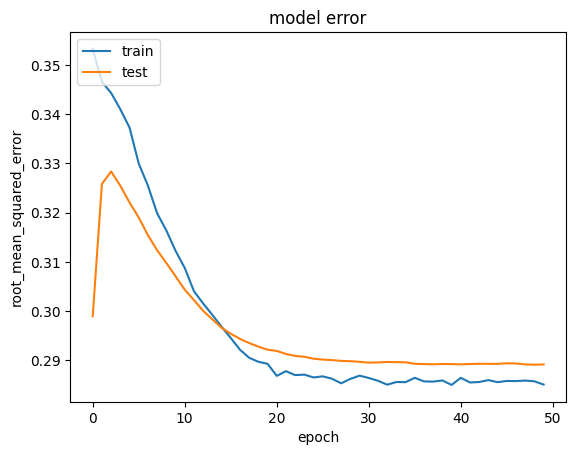

In [28]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

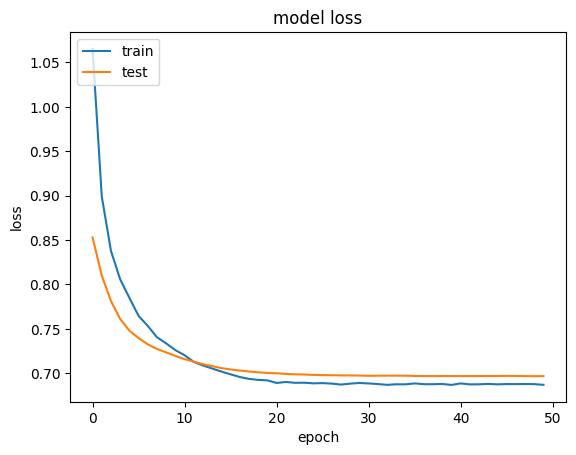

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Try Recommend**

In [30]:
user_id = 2
place_rated = place_rate[place_rate['user_id'] == user_id]

place_not_rated = place[~place['place_id'].isin(place_rated['place_id'])]['place_id']

user_place_array = np.array([[user_id, place_id] for place_id in place_not_rated])


In [31]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = []
for idx in top_ratings_indices:
    if idx < len(place_not_rated):
        recommended_place_ids.append(place_not_rated.values[idx])
    else:
        print("Indeks {} tidak valid untuk place_not_rated.".format(idx))


print('Menampilkan rekomendasi untuk pengguna: {}'.format(user_id))
print('=====' * 8)
print('Tempat dengan rating tinggi dari pengguna')
print('-----' * 8)

if len(place_rated) > 0:
    valid_place_rated = place_rated[place_rated['place_id'].isin(place['place_id'])]

    if len(valid_place_rated) > 0:
        top_place_user = (
            valid_place_rated.sort_values(
                by='rating',
                ascending=False
            )
            .head(5)
            .place_id.values
        )
        place_df_rows = place[place['place_id'].isin(top_place_user)]
        for row in place_df_rows.itertuples():
            print(str(row.place_id) + ':', row.place, '-', row.category)
    else:
        print('Pengguna belum memberikan rating pada tempat manapun.')

print('-----' * 8)
print('Rekomendasi 10 tempat teratas')
print('-----' * 8)

recommended_place = place[place['place_id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(str(row.place_id) + ':', row.place, '-', row.category)

20/20 [==============================] - 0s 3ms/step
Menampilkan rekomendasi untuk pengguna: 2
Tempat dengan rating tinggi dari pengguna
----------------------------------------
1074: Argo Wisata Salak Tanjungharjo - Wisata Alam
1082: Negeri Atas Angin - Wisata Alam
1123: Pemandian Kelapa Gading - Wisata Alam
1481: Pantai Taman - Wisata Alam
1497: Bukit Kehi - Wisata Alam
----------------------------------------
Rekomendasi 10 tempat teratas
----------------------------------------
1111: Pemandian Air Panas Blawan - Wisata Alam
1272: Malang Night Market - Budaya
1329: Kampung Lawas Maspati - Budaya
1394: Kampung Batik Sidomukti - Budaya
1395: Kampung Susu Singolangu - Wisata Alam
1433: Pemandian Air Panas Padusan - Wisata Alam
1446: Candi Banjarsari - Budaya
1568: Regulo Lintas Nusantara Rafting - Wisata Alam
1594: Kolam Renang Puri Surya Jaya - Taman Hiburan
1607: Air Terjun Talempong - Wisata Alam


**Deploy to TFJS**

In [32]:
#tf.saved_model.save(model, '/content/capstone')

In [33]:
#!pip install tensorflowjs


In [34]:
#!tensorflowjs_converter --input_format=tf_saved_model /content/capstone /content/capstone/tfjs_model


In [35]:
#from google.colab import files
#import shutil

#shutil.make_archive('/content/capstone_model', 'zip', '/content/capstone')

#files.download('/content/capstone_model.zip')
